In [ ]:
#Load the dataset into a data frame using Python.
#Clean the data as needed.
#Plot a line chart to show the average temperature fluctuations in Tunisia and Cameroon. Interpret the results.
#Zoom in to only include data between 1980 and 2005, try to customize the axes labels.
#Create Histograms to show temperature distribution in Senegal between [1980,2000] and [2000,2023] (in the same figure). Describe the obtained results.
#Select the best chart to show the Average temperature per country.

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [23]:
# Load the dataset
df = pd.read_csv('Africa_climate_change.csv')
# Display the first few rows to understand the structure
df.head(20)

,DATE,PRCP,TAVG,TMAX,TMIN,COUNTRY
0,19800101 000000,NaN,54.0,61.0,43.0,Tunisia
1,19800101 000000,NaN,49.0,55.0,41.0,Tunisia
2,19800101 000000,0.00,72.0,86.0,59.0,Cameroon
3,19800101 000000,NaN,50.0,55.0,43.0,Tunisia
4,19800101 000000,NaN,75.0,91.0,NaN,Cameroon
5,19800101 000000,NaN,52.0,61.0,45.0,Tunisia
6,19800101 000000,0.00,76.0,97.0,59.0,Senegal
7,19800101 000000,0.00,74.0,95.0,59.0,Senegal
8,19800101 000000,0.00,78.0,93.0,63.0,Senegal
9,19800101 000000,0.00,76.0,91.0,59.0,Senegal


In [ ]:
Data Cleaning:
Check for any missing values or outliers, particularly in the temperature columns.
Convert the DATE column to a datetime object for easier date filtering and manipulation.
Filter the data to only include the relevant countries: Tunisia, Cameroon, and Senegal.

In [24]:
# Check for missing values
print(df.isnull().sum())
# Convert 'DATE' to datetime format
df['DATE'] = pd.to_datetime(df['DATE'])
# Filter the data for relevant countries
countries_of_interest = ['Tunisia', 'Cameroon', 'Senegal']
df = df[df['COUNTRY'].isin(countries_of_interest)]

DATE            0
PRCP       287240
TAVG         6376
TMAX       100914
TMIN       132058
COUNTRY         0
dtype: int64


In [ ]:
Plotting Average Temperature Fluctuations (1980–2005):

C:\Users\PC\AppData\Local\Temp\ipykernel_3756\4125020327.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp['Year'] = df_temp['DATE'].dt.year


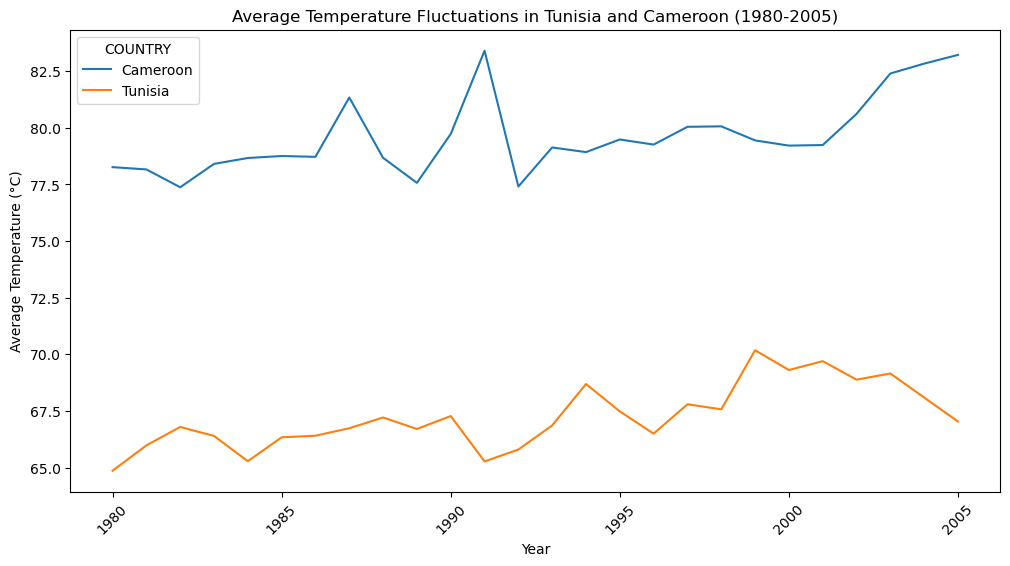

In [25]:
# Filter data for Tunisia and Cameroon between 1980 and 2005
df_temp = df[(df['COUNTRY'].isin(['Tunisia', 'Cameroon'])) &
             (df['DATE'].dt.year >= 1980) & (df['DATE'].dt.year <= 2005)]

# Group by year and country, then calculate the mean temperature
df_temp['Year'] = df_temp['DATE'].dt.year
df_avg_temp = df_temp.groupby(['Year', 'COUNTRY'])['TAVG'].mean().reset_index()

# Plotting
plt.figure(figsize=(12, 6))
sns.lineplot(data=df_avg_temp, x='Year', y='TAVG', hue='COUNTRY')
plt.title('Average Temperature Fluctuations in Tunisia and Cameroon (1980-2005)')
plt.xlabel('Year')
plt.ylabel('Average Temperature (°C)')
plt.xticks(rotation=45)
plt.show()


In [ ]:
Interpretation:
Look at trends in average temperatures over time for both countries. For instance, if both countries show a rise in temperature, it could be indicative of broader climate trends in North and Central Africa during this period.

In [ ]:
Temperature Distribution in Senegal:
Split the data for Senegal into two periods: 1980–2000 and 2000–2023.
Plot two histograms in the same figure.

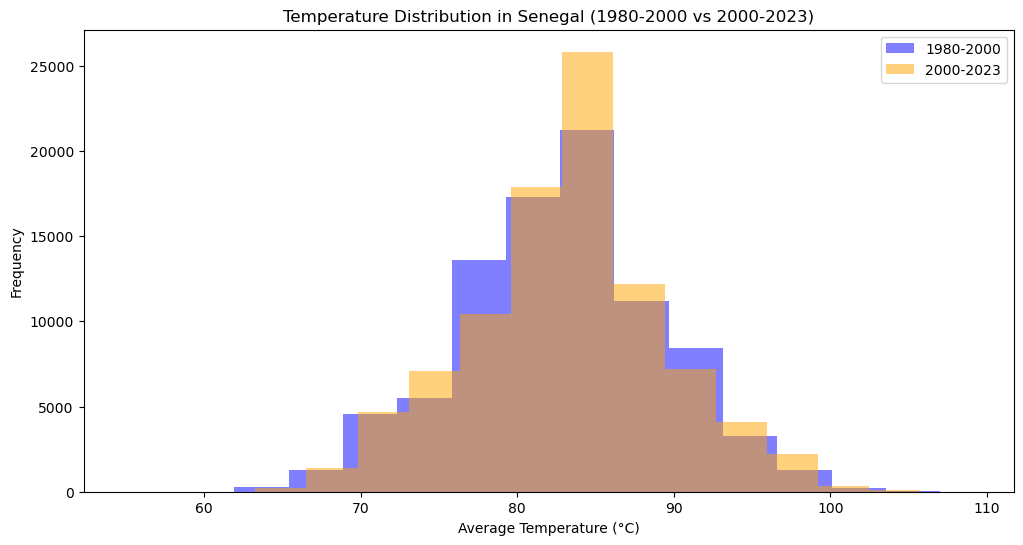

In [26]:
# Filter data for Senegal for the required periods
df_senegal = df[df['COUNTRY'] == 'Senegal']
df_1980_2000 = df_senegal[(df_senegal['DATE'].dt.year >= 1980) & (df_senegal['DATE'].dt.year <= 2000)]
df_2000_2023 = df_senegal[(df_senegal['DATE'].dt.year > 2000) & (df_senegal['DATE'].dt.year <= 2023)]

# Plot histograms
plt.figure(figsize=(12, 6))
plt.hist(df_1980_2000['TAVG'], bins=15, alpha=0.5, label='1980-2000', color='blue')
plt.hist(df_2000_2023['TAVG'], bins=15, alpha=0.5, label='2000-2023', color='orange')
plt.xlabel('Average Temperature (°C)')
plt.ylabel('Frequency')
plt.title('Temperature Distribution in Senegal (1980-2000 vs 2000-2023)')
plt.legend()
plt.show()

In [ ]:
Description:
By comparing histograms, observe if there's a shift in temperature distributions over time. 
For instance, if the distribution shifts rightward in the 2000–2023 period, it suggests warming in Senegal over recent decades.

In [ ]:
Best Chart to Show Average Temperature per Country:
A bar chart with error bars can represent the average temperature per country.

C:\Users\PC\AppData\Local\Temp\ipykernel_3756\2468635136.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df_country_avg, x='COUNTRY', y='TAVG', palette='coolwarm')


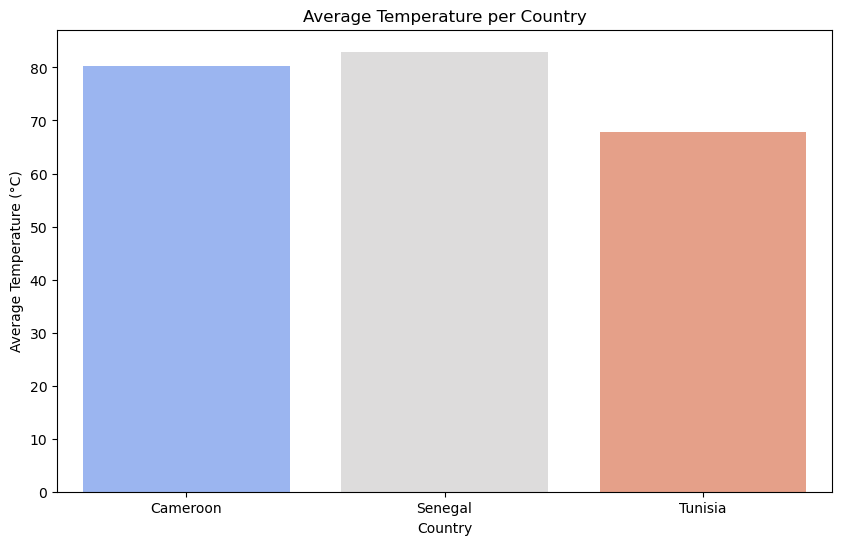

In [27]:
# Calculate average temperature by country
df_country_avg = df.groupby('COUNTRY')['TAVG'].mean().reset_index()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_country_avg, x='COUNTRY', y='TAVG', palette='coolwarm')
plt.title('Average Temperature per Country')
plt.xlabel('Country')
plt.ylabel('Average Temperature (°C)')
plt.show()